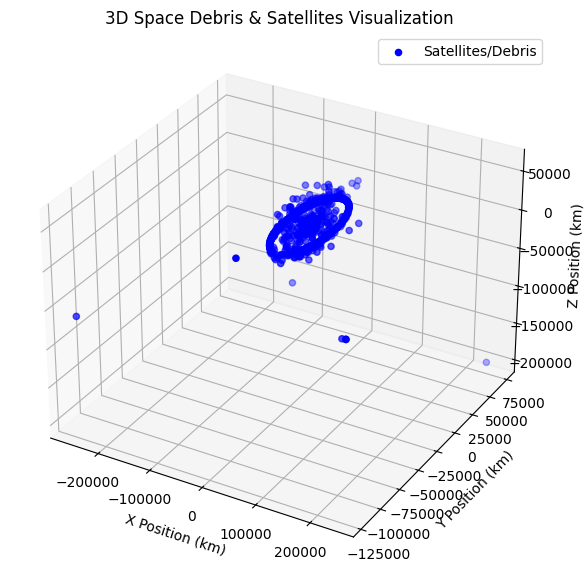

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skyfield.api import load, EarthSatellite

# 🚀 Step 1: Load TLE Data
df = pd.read_csv("tle_data.csv")

# 🚀 Step 2: Load Time Scale
ts = load.timescale()

# 🚀 Step 3: Generate Satellite Positions
positions = []
names = []

for _, row in df.iterrows():
    try:
        satellite = EarthSatellite(row["TLE Line 1"], row["TLE Line 2"], row["Satellite Name"], ts)
        position = satellite.at(ts.now()).position.km
        positions.append(position)
        names.append(row["Satellite Name"])
    except Exception as e:
        print(f"⚠️ Error processing {row['Satellite Name']}: {e}")

# Convert to NumPy array
positions = np.array(positions)

# 🚀 Step 4: Create 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 🚀 Step 5: Plot Satellite Positions
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='blue', marker='o', label="Satellites/Debris")

# 🚀 Step 6: Label & Customize
ax.set_xlabel("X Position (km)")
ax.set_ylabel("Y Position (km)")
ax.set_zlabel("Z Position (km)")
ax.set_title("3D Space Debris & Satellites Visualization")
ax.legend()

# 🚀 Step 7: Show Plot
plt.show()
